In [ ]:
#Description: This program classifies images

In [4]:
# Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [6]:
# Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
# Get the shape of the arrays
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [18]:
# Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

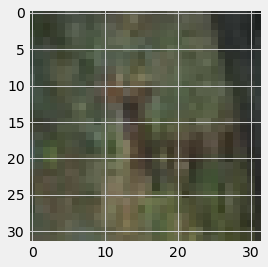

In [19]:
# Show the image as a picture
img = plt.imshow(x_train[index])

In [20]:
# Get the image label
print('The image label isL:', y_train[index])

The image label isL: [4]


In [21]:
# Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [22]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [23]:
# Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [24]:
# Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [25]:
# Normalize the pixels to be values between 0-1
x_train = x_train / 255
x_test = x_test / 255

In [26]:
x_train[index]

[[[0.20784314 0.25490196 0.20784314]
  [0.21176471 0.24705882 0.20392157]
  [0.21960784 0.23529412 0.19607843]
  ...
  [0.18431373 0.2        0.19607843]
  [0.16078431 0.17647059 0.17254902]
  [0.09411765 0.10980392 0.10588235]]

 [[0.18039216 0.23137255 0.16078431]
  [0.20784314 0.24313725 0.17647059]
  [0.21176471 0.23137255 0.17254902]
  ...
  [0.16470588 0.18039216 0.17647059]
  [0.15294118 0.16862745 0.16470588]
  [0.10980392 0.1254902  0.12156863]]

 [[0.17647059 0.23137255 0.14901961]
  [0.19607843 0.23529412 0.16078431]
  [0.18039216 0.20392157 0.13333333]
  ...
  [0.14901961 0.16470588 0.16078431]
  [0.14117647 0.15686275 0.15294118]
  [0.11372549 0.12941176 0.1254902 ]]

 ...

 [[0.27843137 0.3254902  0.25882353]
  [0.29019608 0.3254902  0.25882353]
  [0.31372549 0.33333333 0.2627451 ]
  ...
  [0.2        0.21176471 0.12941176]
  [0.18039216 0.19215686 0.13333333]
  [0.19215686 0.19607843 0.16078431]]

 [[0.29411765 0.32156863 0.2627451 ]
  [0.30980392 0.33333333 0.27058824]


In [29]:
# Create the models architecture
model = Sequential()

# Add the first layer 
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu') )

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add another layer with 500 neurons
model.add(Dense(500, activation='relu'))

# Add another drop out layer
model.add(Dropout(0.5))

# Add another layer with 250 neurons
model.add(Dense(250, activation='relu'))

# Add another layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [31]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [32]:
# Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)



Epoch 1/10
157/157 [==============================] - 59s 367ms/step - loss: 1.8099 - accuracy: 0.3191 - val_loss: 1.5386 - val_accuracy: 0.4281
Epoch 2/10
157/157 [==============================] - 57s 363ms/step - loss: 1.4418 - accuracy: 0.4687 - val_loss: 1.2982 - val_accuracy: 0.5314
Epoch 3/10
157/157 [==============================] - 57s 363ms/step - loss: 1.2863 - accuracy: 0.5331 - val_loss: 1.2314 - val_accuracy: 0.5615
Epoch 4/10
157/157 [==============================] - 57s 364ms/step - loss: 1.1749 - accuracy: 0.5772 - val_loss: 1.1521 - val_accuracy: 0.5970
Epoch 5/10
157/157 [==============================] - 57s 365ms/step - loss: 1.0985 - accuracy: 0.6083 - val_loss: 1.0812 - val_accuracy: 0.6154
Epoch 6/10
157/157 [==============================] - 57s 363ms/step - loss: 1.0180 - accuracy: 0.6386 - val_loss: 1.1383 - val_accuracy: 0.6087
Epoch 7/10
157/157 [==============================] - 57s 366ms/step - loss: 0.9434 - accuracy: 0.6670 - val_loss: 0.9838 - val_ac

In [33]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9297 - accuracy: 0.6810


0.6809999942779541

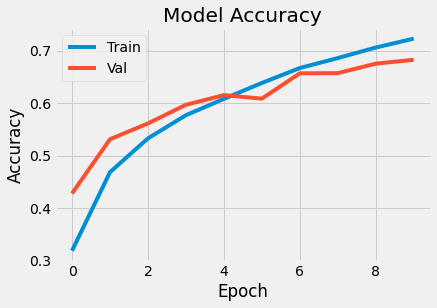

In [37]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

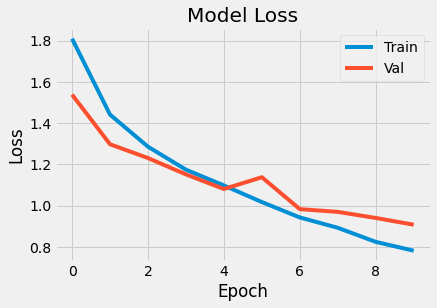

In [38]:
# Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [39]:
# Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving cat img.jpg to cat img.jpg


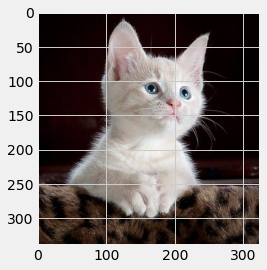

In [40]:
# Show the image
new_image = plt.imread('cat img.jpg')
img = plt.imshow(new_image)

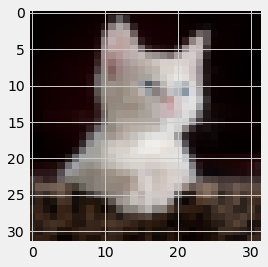

In [44]:
# Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)


In [45]:
# Get the models predictions
predictions = model.predict(np.array([resized_image]))
# Show the predictions
predictions

array([[2.3634285e-03, 1.9001732e-04, 1.9769311e-02, 8.8515979e-01,
        7.7234936e-04, 8.2204700e-02, 6.5774252e-03, 1.7934248e-03,
        8.1572385e-04, 3.5388241e-04]], dtype=float32)

In [46]:
#Sort the predictions from lesat to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      list_index[i], list_index[j] = list_index[j], list_index[i]

# Show the sorted labels in order
print(list_index)

[3, 5, 2, 6, 0, 7, 8, 4, 9, 1]


In [49]:
# print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 88.52 %
dog : 8.22 %
bird : 1.98 %
frog : 0.66 %
airplane : 0.24 %
